<a href="https://colab.research.google.com/github/john21morales/Beginner-Projects/blob/main/faire_data_abc_analysis_additional_analysis_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Loading and Preprocessing:

In [89]:
import numpy as np
import pandas as pd
import gspread

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

# Given Google Sheet URL
sheet_url = "https://docs.google.com/spreadsheets/d/1EOPMbmPrvrPN5yDIUvptXVwtsotX1NGQb8D3--HjLqk/edit#gid=748166369"

# Load the data from the Google Sheet
df = fetch_data_from_sheet(sheet_url, gc)

df['Wholesale Price'] = df['Wholesale Price'].str.replace('$', '', regex=True).astype(float)

# Convert 'Quantity' column to a numeric type
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Handle any NaN values. Here, I'm filling them with 0, but you can handle them as you see fit.
df['Quantity'].fillna(0, inplace=True)

# Now, attempt the multiplication operation
df['Annual Consumption Value'] = df['Quantity'] * df['Wholesale Price']

# Extract the year from "Order Date" column
df['Year'] = pd.to_datetime(df['Order Date']).dt.year

# Calculate the Order Total for each unique order number
df['Total Order'] = df.groupby('Order Number')['Annual Consumption Value'].transform('sum')

# Create a unique address column by combining the relevant address fields
df['Unique Address'] = df['Address 1'].astype(str) + ' ' + \
                       df['Address 2'].astype(str) + ' ' + \
                       df['City'].astype(str) + ' ' + \
                       df['State'].astype(str) + ' ' + \
                       df['Zip Code'].astype(str) + ' ' + \
                       df['Country'].astype(str)

# Display the first few rows of the dataframe
df.head()


,Order Date,Order Number,Retailer Name,Address 1,Address 2,City,State,Zip Code,Country,Product Name,...,Status,Quantity,Wholesale Price,Retail Price,Ship Date,Scheduled Order Date,Annual Consumption Value,Year,Total Order,Unique Address
0,"November 2, 2023",J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,[BUY BULK] Coconut Bottle Brush,...,New,12,3.5,$7,No ship date,No scheduled order date,42.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...
1,"November 2, 2023",J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,[BUY BULK] BULK SETS of Swedish Sponge Cloths,...,New,10,8.0,$16,No ship date,No scheduled order date,80.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...
2,"November 2, 2023",J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,[BUY BULK] BULK SETS of Swedish Sponge Cloths,...,New,10,8.0,$16,No ship date,No scheduled order date,80.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...
3,"November 2, 2023",J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,Holly Jolly - Swedish Sponge Cloth Set,...,New,8,8.0,$16,No ship date,No scheduled order date,64.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...
4,"November 2, 2023",J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,Cats - Swedish Sponge Cloth,...,New,8,3.0,$6,No ship date,No scheduled order date,24.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...


## 1.2 Create Pre-ordered column (temporary / test)

In [31]:
# Chunk One Point Two: Create Pre-ordered column

# Condition for products that have any value in "ship date" column
condition_ship_date = df['Ship Date'].notnull() & (df['Ship Date'] != "No ship date")

# Condition for "status" column not being "shipped"
condition_status = df['Status'] != 'Shipped'

# Assigning values based on conditions
df['pre-ordered'] = np.where(condition_ship_date & condition_status, 'pre-ordered', 'not pre-ordered')

# Displaying a sample of the dataframe to verify
df_sample_updated = df.sample(10)
df_sample_updated

,Order Date,Order Number,Retailer Name,Address 1,Address 2,City,State,Zip Code,Country,Product Name,...,Quantity,Wholesale Price,Retail Price,Ship Date,Scheduled Order Date,Annual Consumption Value,Year,Total Order,Unique Address,pre-ordered
2759,"August 6, 2023",7UMXJQK8PS,Linens etc.,7 Superior Street,Unit C,Devon,AB,T9G 1E9,Canada,Set of 3 Sea Soaked Pop up Sponges,...,2,4.30,$8.59,"September 7, 2023",No scheduled order date,8.60,2023,54.96,7 Superior Street Unit C Devon AB T9G 1E9 Canada,pre-ordered
14903,"July 18, 2022",7XGD2T6GQD,Exist Green,"4914 Underwood Avenue, Suite A",,OMAHA,NE,68132,United States,Eco Sponge,...,20,1.75,$3.50,"July 22, 2022",No scheduled order date,35.00,2022,539.34,"4914 Underwood Avenue, Suite A OMAHA NE 68132...",pre-ordered
13278,"September 1, 2022",DQ7C9VPKXP,Bona Fide LLC,25 North Main Street,,Concord,NH,3301,United States,Potting Around - Set of 3 Swedish Sponge Cloths,...,1,8.00,$16,"September 1, 2022",No scheduled order date,8.00,2022,285.67,25 North Main Street Concord NH 3301 United S...,pre-ordered
8963,"January 24, 2023",JDYSW747SN,Infinity Massage & Wellness,3802 Trinity Road,suite B,Duluth,MN,55811,United States,Eucalyptus - Swedish Sponge Cloth,...,1,3.00,$6,"February 5, 2023",No scheduled order date,3.00,2023,357.13,3802 Trinity Road suite B Duluth MN 55811 Unit...,pre-ordered
3481,"July 18, 2023",WMPFERTSHU,Santé Studios,6311 Larch Street,,Vancouver,BC,V6M 4E8,Canada,Sisal Dish Brush,...,2,4.73,$9.46,"July 21, 2023",No scheduled order date,9.46,2023,85.95,6311 Larch Street Vancouver BC V6M 4E8 Canada,pre-ordered
18387,"February 4, 2022",ZUV863NDHW,Ren Market,1832 W Superior Street,Suite 104,Duluth,MN,55806,United States,Kraft Paper Tape (for business/packing use),...,1,9.50,$19,"February 22, 2022",No scheduled order date,9.50,2022,478.48,1832 W Superior Street Suite 104 Duluth MN 558...,pre-ordered
10798,"November 26, 2022",V9FRAHURGQ,Miss Sophie's,17 Ontario Street,,Stratford,ON,N5A 3G7,Canada,Solid Dish Soap Bar (8oz),...,5,5.61,$11.21,"December 6, 2022",No scheduled order date,28.05,2022,197.22,17 Ontario Street Stratford ON N5A 3G7 Canada,pre-ordered
18534,"February 2, 2022",Q5VHGS837V,Of Land And Sea Co.,8638 West Camden Drive,,Elk Grove,CA,95624,United States,(Tester) Multi-pocket Tote Bag,...,1,6.00,N/A,"February 11, 2022",No scheduled order date,6.00,2022,108.66,8638 West Camden Drive Elk Grove CA 95624 Uni...,pre-ordered
21963,"September 19, 2021",EQUFGDR9GM,Awaken Well Centre for Health Corp.,619 A Front Street,,Nelson,BC,V1L 4B6,Canada,(Tester) Loofah Dishwashing Sponge,...,1,1.00,N/A,"September 29, 2021",No scheduled order date,1.00,2021,243.01,619 A Front Street Nelson BC V1L 4B6 Canada,pre-ordered
20295,"November 13, 2021",EHXMK7YSHU,Alpine Alternative Health,90 Main Highway 89,,Alpine,WY,83128,United States,Soap Bag,...,1,4.50,$9,"November 23, 2021",No scheduled order date,4.50,2021,230.95,90 Main Highway 89 Alpine WY 83128 United States,pre-ordered


# Pre Order Analysis : Check

In [32]:
pre_ordered_subset = df[df['pre-ordered'] == 'pre-ordered']['Order Number']
non_pre_ordered_subset = df[df['pre-ordered'] == 'not pre-ordered']['Order Number']

pre_ordered_samples = pre_ordered_subset.sample(min(10, len(pre_ordered_subset))).tolist()
non_pre_ordered_samples = non_pre_ordered_subset.sample(min(10, len(non_pre_ordered_subset))).tolist()

print('Pre-Ordered List')
print(pre_ordered_samples)
print('Not pre-ordered list')
print(non_pre_ordered_samples)

Pre-Ordered List
['366N4T28TJ', 'TUAVPNWB6F', 'DWE6GDDN58', 'UR8D2KC7UG', '7DPQ58WQVD', 'RM5BH2EJ9E', '8RBX22K475', '32JGDPAFT9', 'EHKTRDX64C', 'SDJNFKUVDU']
Not pre-ordered list
['U7MVFARSB4', 'TTA3UMM25D', 'YG6XNE7S7A', 'BDVKPEYSBN', 'NGHDDWPGXF', 'RWDKZU7A2U', 'RJT4ZJJ74G', 'E7MTP6NNF2', 'ARJKUCOVPM', 'CQUUPVG4J3']


# 2.  Classifying A B C products for ABC analysis. Follow the 80/20 rule as per research
* Grouped in terms of annual consumption value (Revenue that year)

In [33]:
# Group by Year and SKU to get total annual consumption value for each SKU
annual_consumption = df.groupby(['Year', 'SKU', 'Product Name'])['Annual Consumption Value'].sum().reset_index()

# Initialize dictionaries to store ABC classification for each year
abc_classification = {}

# Years for which ABC analysis is to be done
years = [2021, 2022, 2023]

for year in years:
    # Filter data for the specific year
    year_data = annual_consumption[annual_consumption['Year'] == year].copy()

    # Sort the products by annual consumption value in descending order
    year_data.sort_values(by='Annual Consumption Value', ascending=False, inplace=True)

    # Calculate the cumulative sum of annual consumption value
    year_data['Cumulative Sum'] = year_data['Annual Consumption Value'].cumsum()

    # Calculate the total annual consumption value for all products
    total_value = year_data['Annual Consumption Value'].sum()

    # Identify thresholds based on the total annual consumption value
    A_threshold = total_value * 0.80
    B_threshold = total_value * 0.95

    # Classify products based on thresholds
    year_data['Classification'] = 'C'
    year_data.loc[year_data['Cumulative Sum'] <= A_threshold, 'Classification'] = 'A'
    year_data.loc[(year_data['Cumulative Sum'] > A_threshold) & (year_data['Cumulative Sum'] <= B_threshold), 'Classification'] = 'B'

    # Store the classification for the year
    abc_classification[year] = year_data

# Combine the results for all years
abc_df = pd.concat(abc_classification.values())

# Show a sample
abc_df.sample(10)


,Year,SKU,Product Name,Annual Consumption Value,Cumulative Sum,Classification
285,2021,PT-ZWD-SM-01,Zero Waste Deodorant Bar - Rose & Citrus,1527.75,67340.07,A
154,2021,PT-SSC-3LASET-01,New Line Art - Swedish Sponge Cloth Set,321.85,108094.22,B
735,2023,PT-PUS-3SET-01,Set of 3 Bestselling Pop up Sponge,4044.09,77868.93,A
238,2021,PT-SSC-ORSOLO-01,(Tester) Orange - Swedish Sponge Cloth,3.00,122623.67,C
830,2023,PT-SSC-3ENSET-02,Elements of Nature - Swedish Sponge Cloth Set,1777.94,133052.74,A
325,2022,PT-DESR-RGSOLO-01,(Tester) Double Edge Safety Razor (5 Free Blades),88.00,239133.65,C
290,2022,,Adjustment for Missing and Extra Items,18.00,242522.56,C
226,2021,PT-SSC-LLSOLO-01,(Tester) Llama - Swedish Sponge Cloth,7.50,122519.03,C
165,2021,PT-SSC-3OSET-01,Origami - Swedish Sponge Cloth Set,443.53,103112.69,B
90,2021,PT-SBCB-OSB-01,Rebalancing Shampoo Bar,237.44,111476.69,B


# 3. Visualization of Product Counts and Revenue by Category: 80 - 15 - 5
* We cam see that with the 80-15-5 rule, most of our products are B category products.
* We can see that A products generate 80% of our Annual Consumption Value. We can also see that B tier categories, around 15 and C tier categories, around 1 to 5 percent
* An intriguing trend over the years is that **B and C tier products are actually improving, over the years, in terms of Revenue.**

* Exact numbers of products in A :
                                   2021 - 51,
                                   2022 - 73,
                                   2023 - 91
* Exact numbers of products in B :
                                   2022 - 61,
                                   2022 - 75,
                                   2023 - 71
* Exact number of products in C :  
                                   2023 - 170,
                                   2022 - 199,
                                   2023 - 95


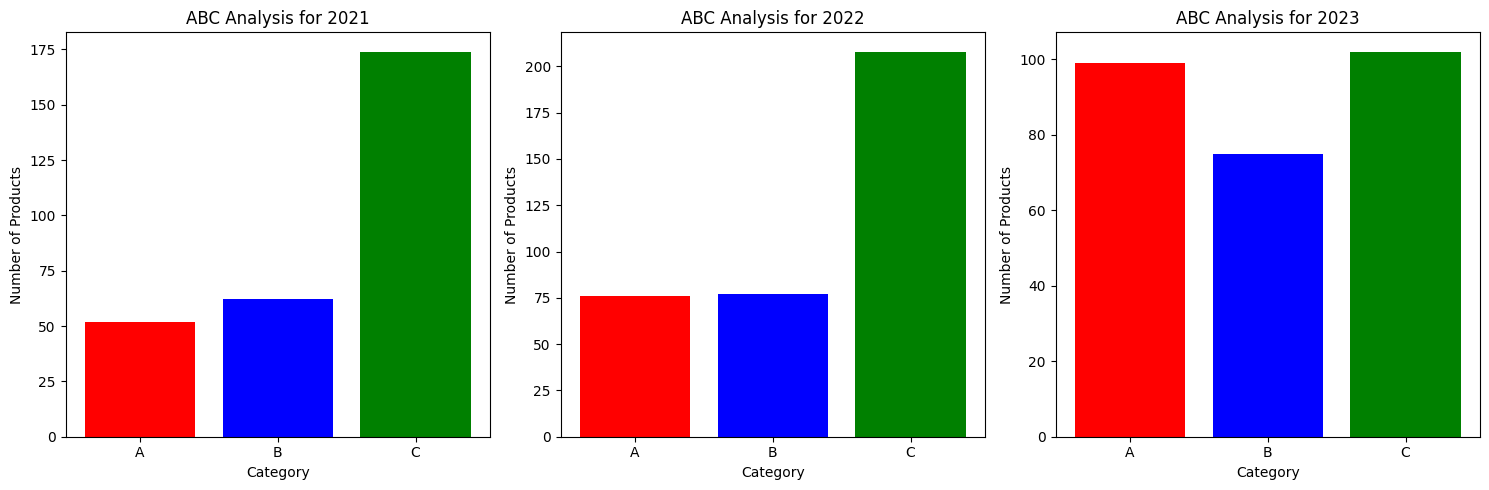

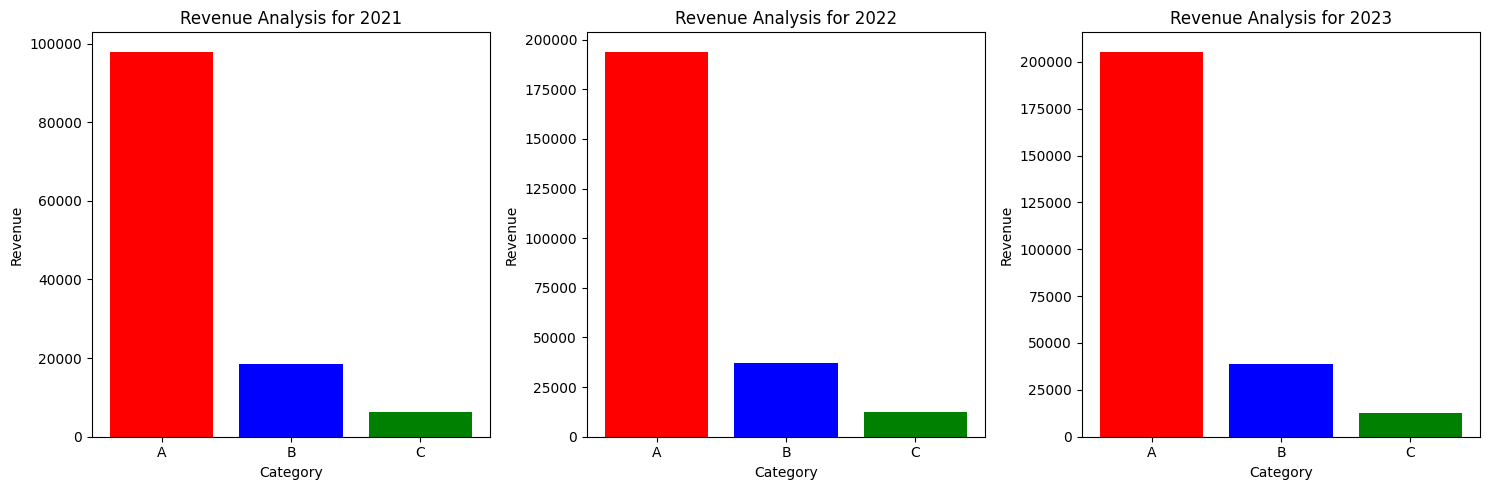

In [34]:
import matplotlib.pyplot as plt

# Initialize lists to store the counts and revenues of A, B, and C products for each year
new_abc_counts = []
new_abc_revenues = []

# Calculate the counts and revenues for A, B, and C products for each year
for year in years:
    year_data = abc_df[abc_df['Year'] == year]
    A_count = len(year_data[year_data['Classification'] == 'A'])
    B_count = len(year_data[year_data['Classification'] == 'B'])
    C_count = len(year_data[year_data['Classification'] == 'C'])
    new_abc_counts.append([A_count, B_count, C_count])

    A_revenue = year_data[year_data['Classification'] == 'A']['Annual Consumption Value'].sum()
    B_revenue = year_data[year_data['Classification'] == 'B']['Annual Consumption Value'].sum()
    C_revenue = year_data[year_data['Classification'] == 'C']['Annual Consumption Value'].sum()
    new_abc_revenues.append([A_revenue, B_revenue, C_revenue])

# Plot the bar graph for each year for product counts
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5))

for idx, ax in enumerate(axes):
    ax.bar(['A', 'B', 'C'], new_abc_counts[idx], color=['red', 'blue', 'green'])
    ax.set_title(f'ABC Analysis for {years[idx]}')
    ax.set_ylabel('Number of Products')
    ax.set_xlabel('Category')

plt.tight_layout()
plt.show()

# Plot the bar graph for each year for revenues
fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(15, 5))

for idx, ax in enumerate(axes):
    ax.bar(['A', 'B', 'C'], new_abc_revenues[idx], color=['red', 'blue', 'green'])
    ax.set_title(f'Revenue Analysis for {years[idx]}')
    ax.set_ylabel('Revenue')
    ax.set_xlabel('Category')

plt.tight_layout()
plt.show()

In [35]:
# Creating a table for the number of products in each A-B-C category for the 80-15-5 analysis

# Initialize a list to store the counts for A, B, and C products for each year
abc_counts_80155 = []

# Calculate the counts for A, B, and C products for each year using abc_df
for year in years:
    year_data = abc_df[abc_df['Year'] == year]
    A_count = len(year_data[year_data['Classification'] == 'A'])
    B_count = len(year_data[year_data['Classification'] == 'B'])
    C_count = len(year_data[year_data['Classification'] == 'C'])
    abc_counts_80155.append([year, A_count, B_count, C_count])

# Convert the counts to a DataFrame
abc_counts_df = pd.DataFrame(abc_counts_80155, columns=['Year', 'A (80%)', 'B (15%)', 'C (5%)'])
abc_counts_df


,Year,A (80%),B (15%),C (5%)
0,2021,52,62,174
1,2022,76,77,208
2,2023,99,75,102


# 4. Tables, top 10 for A, B, C category per year.

In [36]:
# Chunk Four: Tables for top 10 products for A, B, C category per year (80-15-5 rule)

# Function to get top products for a given category and year
def get_top_products(year, category):
    # Filter the dataframe based on year and category
    filtered_data = abc_df[(abc_df['Year'] == year) & (abc_df['Classification'] == category)]

    # Sort by 'Annual Consumption Value' and get top 10
    top_products = filtered_data.sort_values(by='Annual Consumption Value', ascending=False).head(10)

    return top_products[['Product Name', 'Annual Consumption Value']]

# Initialize a dictionary to store the results
top_products_data = {}

# Extract top 10 products for each category for each year
for year in years:
    for category in ['A', 'B', 'C']:
        key = f'{year}_{category}'
        top_products_data[key] = get_top_products(year, category)

# Display the tables for A products for each year
category = 'A'
top_a_products = {}
for year in years:
    top_a_products[year] = top_products_data[f'{year}_{category}']

top_a_products


{2021:                                  Product Name  Annual Consumption Value
 19               Dry Body Brush (medium-firm)                   9026.10
 115                 Sisal & Palm Pot Scrubber                   8286.11
 110                 Solid Dish Soap Bar (8oz)                   7125.08
 106               Dual-layer Bamboo Soap Dish                   6275.35
 264                     Self-drying Soap Dish                   4024.72
 69                       Reusable Cotton Buds                   3480.89
 103             Sisal Dish Brush (Brush Only)                   3378.06
 113              Solid Dish Soap Brick (13oz)                   3252.41
 282  Zero Waste Deodorant Bar - Rose & Citrus                   2709.16
 52                      Multi-pocket Tote Bag                   2696.65,
 2022:                                        Product Name  Annual Consumption Value
 470                     Dual-layer Bamboo Soap Dish                  13812.02
 474                      

In [38]:
# Display the tables for B products for each year
category = 'B'
top_b_products = {}
for year in years:
    top_b_products[year] = top_products_data[f'{year}_{category}']

# Display the tables for C products for each year
category = 'C'
top_c_products = {}
for year in years:
    top_c_products[year] = top_products_data[f'{year}_{category}']

top_b_products, top_c_products

({2021:                                        Product Name  Annual Consumption Value
  44                         NEW Bamboo Kitchen Cloth                    590.78
  241                   Swedish Sponge Cloth - Orange                    581.33
  147        Swedish Sponge Cloth Set - Healing Herbs                    565.85
  201                   Cactus - Swedish Sponge Cloth                    540.56
  119                               Stain Remover Bar                    539.57
  240                   Orange - Swedish Sponge Cloth                    492.84
  78      Rebalancing Shampoo and Conditioner Bar Set                    481.86
  144  Healing Herbs - Set of 3 Swedish Sponge Cloths                    452.23
  97                          Sisal Dish Brush Refill                    450.00
  165              Origami - Swedish Sponge Cloth Set                    443.53,
  2022:                                       Product Name  Annual Consumption Value
  537       Reusable Cotton 

## ABC 80-15-5 Findings
* The specific products that consistently appear in the top 10 of Category “A” across the years could be flagship products or seasonal best-sellers.
* If many pre-ordered products fall into Category “A”, it indicates a strong demand anticipation for these high-revenue items. If they’re in “C”, it might be due to long lead times or rarity.
* Category A products should be the focus of inventory optimization.

#### Top A Products from 2021
1. Dry Body Brush (medium-firm)
2. Sisal & Palm Pot Scrubber
3. Solid Dish Soap Bar (8oz)
4. Dual-layer Bamboo Soap Dish
5. Self-drying Soap Dish
6. Reusable Cotton Buds
7. Sisal Dish Brush (Brush Only)
8. Solid Dish Soap Brick (13oz)
9. Zero Waste Deodorant Bar - Rose and Citrus
10. Multi-pocket Tote Bag

#### Top A Products from 2022
1. Dual-Layer Bamboo Soap Dish
2. Solid Dish Soap Bar (8oz)
3. Sisal & Palm Pot Scrubber
4. Wooden Essential Oil Diffuser for Car
5. Sisal Dish Brush
6. Dry Body Brush (medium-firm)
7. Reusable Cotton Buds
8. Self-Drying Soap Dish
9. Set of 5 Sisal Bottle Brushes
10. Healing Herbs - Set of 3 Swedish Sponge Cloths

#### Top A Products from 2023
1. Dual-layer Bamboo Soap Dish
2. Solid Dish Soap Bar (8oz)
3. Wooden Essential Oil Diffuser for Car
4. [BUY BULK] Sisal & Palm Pot Scrubber
5. Sisal Dish Brush
6. Self-drying Soap Dish
7. Reusable Cotton Buds
8. Dry Body Brush (medium-firm)
9. Eucalyptus - Pop up Sponge
10. Set of 3 Bestselling Pop up Sponge

#### Top B Products from 2021
1. Healing Herbs - Set of 3 Swedish Sponge Cloths   
2. Sisal Dish Brush Refill   
3. Origami - Swedish Sponge Cloth Set   
4. Rebalancing Shampoo and Conditioner Bar Set   
5. Hydrating Conditioner Bar   
6. Healing Herbs - Swedish Sponge Cloth Set (Pre-...   
7. Swedish Sponge Cloth Set - Leaf   
8. Loofah Shower Pad   
9. Set of 3 Organic Cotton Muslin Bags   
10. Green Tree - Swedish Sponge Cloth

#### Top B Products from 2022
1. Reusable Cotton Rounds - Bamboo Charcoal
2. Bamboo Hair Brush Set
3. Set of 3 Organic Cotton Muslin Bags
4. [BUY BULK] BULK SETS of Swedish Sponge Cloths
5. Leaf - Swedish Sponge Cloth
6. [BUY BULK] BULK SETS of Swedish Sponge Cloths
7. Summer Feels - Set of 3 Swedish Sponge Cloths
8. Anise Blossom - Swedish Sponge Cloth
9. Stain Remover Bar - NEW DESIGN
10. Konjac Facial Sponge - Charcoal

#### Top B Products from 2023
1. Sisal & Palm Vegetable Brush
2. Potting Around - Set of 3 Swedish Sponge Cloths
3. Sisal Dish Brush Refill (Brush Head Only)
4. Double Edge Safety Razor (5 Free Blades)
5. Loofah Shower Pad
6. Zero Waste Deodorant Bar - Rose & Citrus
7. Multi-pocket Tote Bag
8. Natural Deodorant Stick - Unscented
9. Soap Bag
10. Wooden Essential Oil Diffuser for On-the-go

## ABC 80-15-5 Strategic Implications
* **Allocate resources effectively**
    * Spend more time and resources on category A items



* **Adjust purchasing strategies**: Optimize quantities based on ABC categorization

* **Review pricing strategies**: Are Category C items priced competitively? Could A items command a higher price?

* Recommended by ChatGPT - Just in Time Inve
https://www.youtube.com/watch?v=zCTmN17ZDek


Ensures there is enough stock to produce what’s needed, when its needed.
Goal : High volume production, with minimal inventory on hand
Pros : Less inventory cost, minimize warehouse needs, decrease waste
Cons : Logistically harder, will be harder to meet unexpected demand


## Last resort for category C products
* If certain **C items** are not moving, consider **clearance sales or promotions** to clear out stock.
* Find out which **C items** work best with **A items**. **Make bundles** of these combinations. The A items would prove as leverage to get C items.


# 5) A B C - 50-30-20
- 50-30-20 further shows the significance of A products (Makes sense as this style of grouping will be more generous in terms of product tier

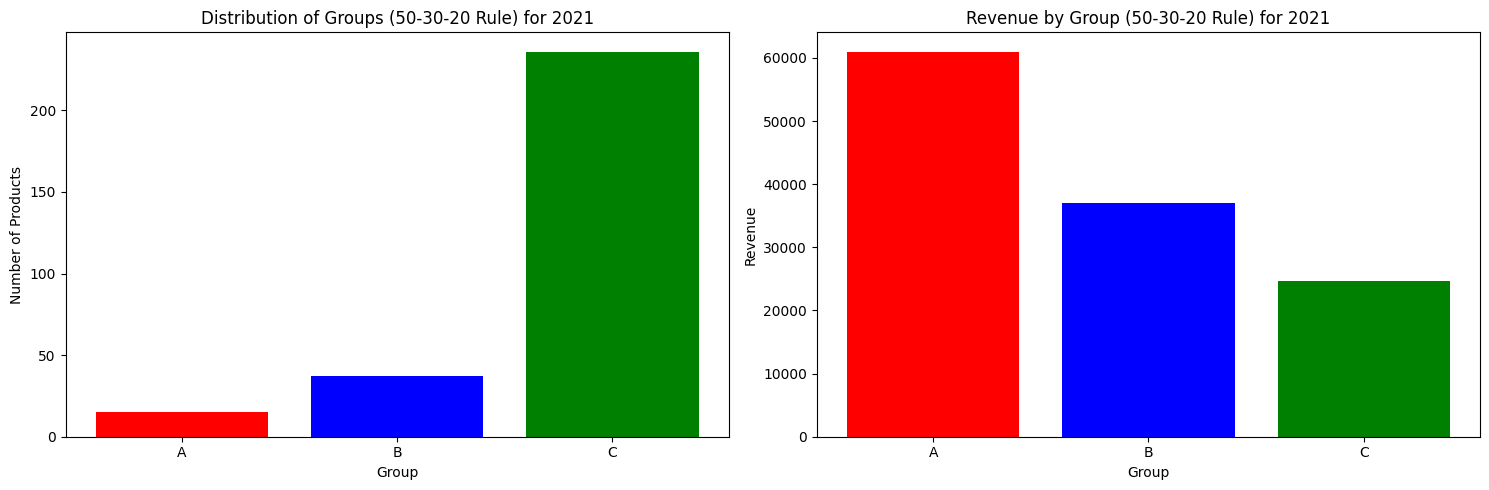

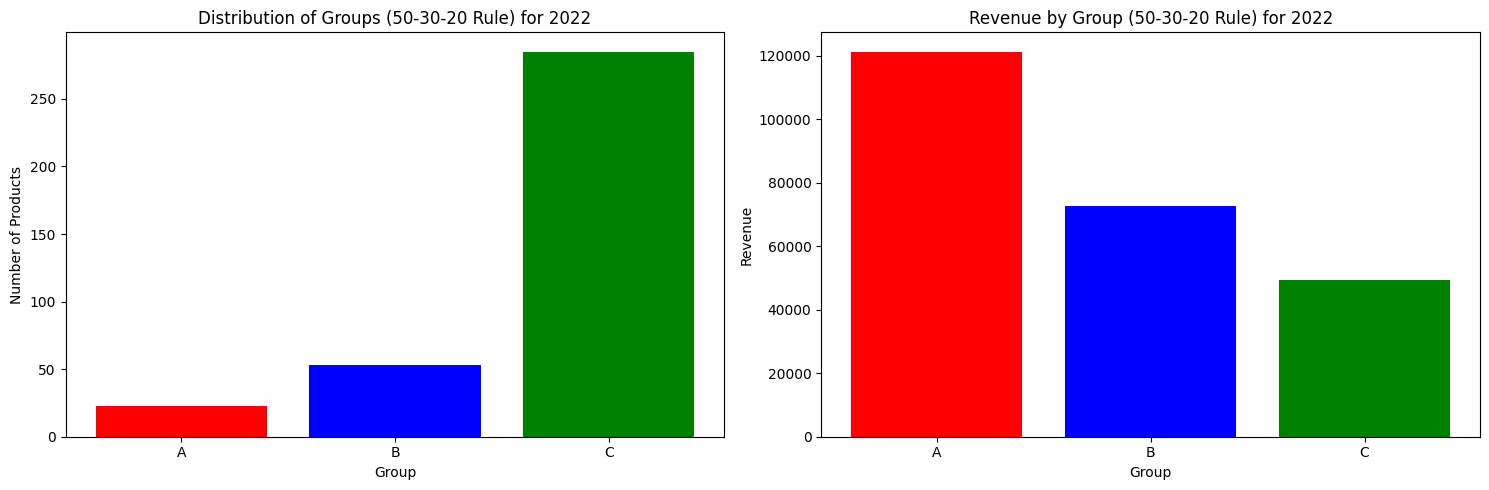

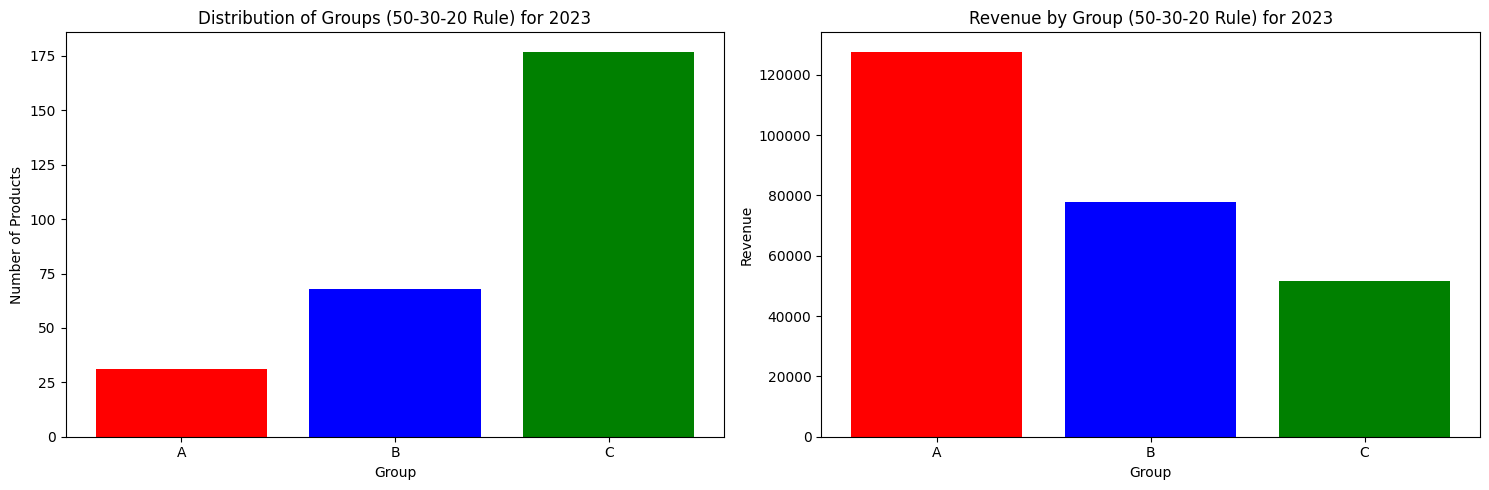

In [39]:
# Re-running Chunk 5

# Function to perform custom ABC analysis for 50-30-20 rule
def perform_custom_abc_analysis(df, years=[2021, 2022, 2023]):
    # Group by Year and SKU to get total annual consumption value for each SKU
    annual_consumption_custom = df.groupby(['Year', 'SKU', 'Product Name'])['Annual Consumption Value'].sum().reset_index()

    # Initialize columns for ABC classification for each year
    for year in years:
        annual_consumption_custom[f'{year}_ABC_503020'] = ''

    for year in years:
        # Filter data for the specific year
        year_data = annual_consumption_custom[annual_consumption_custom['Year'] == year]
        year_data = year_data.sort_values(by='Annual Consumption Value', ascending=False)

        total_revenue = year_data['Annual Consumption Value'].sum()

        # Calculate cumulative sum of revenue
        year_data['Cumulative Sum'] = year_data['Annual Consumption Value'].cumsum()

        # Define thresholds for custom ABC classification (50-30-20 rule)
        A_threshold = total_revenue * 0.50  # 50%
        B_threshold = total_revenue * 0.80  # 50% + 30% = 80%

        # Assign ABC classification based on thresholds
        annual_consumption_custom.loc[year_data[year_data['Cumulative Sum'] <= A_threshold].index, f'{year}_ABC_503020'] = 'A'
        annual_consumption_custom.loc[year_data[(year_data['Cumulative Sum'] > A_threshold) &
                                                (year_data['Cumulative Sum'] <= B_threshold)].index, f'{year}_ABC_503020'] = 'B'
        annual_consumption_custom.loc[year_data[year_data['Cumulative Sum'] > B_threshold].index, f'{year}_ABC_503020'] = 'C'

    return annual_consumption_custom

# Perform the custom ABC analysis for 50-30-20 rule for years 2021, 2022, 2023
custom_abc_df = perform_custom_abc_analysis(df, years=years)

# Initialize lists to store the counts and revenues for each group for the 50-30-20 rule
abc_503020_counts = []
abc_503020_revenues = []

# Calculate the counts and revenues for each group for each year
for year in years:
    year_data = custom_abc_df[custom_abc_df['Year'] == year]
    A_count = len(year_data[year_data[f'{year}_ABC_503020'] == 'A'])
    B_count = len(year_data[year_data[f'{year}_ABC_503020'] == 'B'])
    C_count = len(year_data[year_data[f'{year}_ABC_503020'] == 'C'])
    abc_503020_counts.append([A_count, B_count, C_count])

    A_revenue = year_data[year_data[f'{year}_ABC_503020'] == 'A']['Annual Consumption Value'].sum()
    B_revenue = year_data[year_data[f'{year}_ABC_503020'] == 'B']['Annual Consumption Value'].sum()
    C_revenue = year_data[year_data[f'{year}_ABC_503020'] == 'C']['Annual Consumption Value'].sum()
    abc_503020_revenues.append([A_revenue, B_revenue, C_revenue])

# Plot the graphs for each year separately
for idx, year in enumerate(years):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Plot the distribution of the groups (Number of Products)
    ax = axes[0]
    ax.bar(['A', 'B', 'C'], abc_503020_counts[idx], color=['red', 'blue', 'green'])
    ax.set_title(f'Distribution of Groups (50-30-20 Rule) for {year}')
    ax.set_ylabel('Number of Products')
    ax.set_xlabel('Group')

    # Plot the distribution of the groups (Revenue)
    ax = axes[1]
    ax.bar(['A', 'B', 'C'], abc_503020_revenues[idx], color=['red', 'blue', 'green'])
    ax.set_title(f'Revenue by Group (50-30-20 Rule) for {year}')
    ax.set_ylabel('Revenue')
    ax.set_xlabel('Group')

    plt.tight_layout()
    plt.show()

In [40]:
# Update the function `get_top_products_503020` to work with the 50-30-20 ABC analysis
def get_top_products_503020(year, category, abc_df):
    # Filter the dataframe based on year and category
    filtered_data = abc_df[(abc_df['Year'] == year) & (abc_df[f'{year}_ABC_503020'] == category)]

    # Sort by 'Annual Consumption Value' and get top 10
    top_products = filtered_data.sort_values(by='Annual Consumption Value', ascending=False).head(10)

    return top_products[['Product Name', 'Annual Consumption Value']]

# Initialize a dictionary to store the results for 50-30-20 ABC analysis
top_products_data_503020 = {}

# Extract top 10 products for each category for each year using 50-30-20 ABC analysis
for year in years:
    for category in ['A', 'B', 'C']:
        key = f'{year}_{category}_503020'
        top_products_data_503020[key] = get_top_products_503020(year, category, custom_abc_df)

# Display the tables for A products for each year using 50-30-20 ABC analysis
category = 'A'
top_a_products_503020 = {}
for year in years:
    top_a_products_503020[year] = top_products_data_503020[f'{year}_{category}_503020']

top_a_products_503020

{2021:                                  Product Name  Annual Consumption Value
 19               Dry Body Brush (medium-firm)                   9026.10
 115                 Sisal & Palm Pot Scrubber                   8286.11
 110                 Solid Dish Soap Bar (8oz)                   7125.08
 106               Dual-layer Bamboo Soap Dish                   6275.35
 264                     Self-drying Soap Dish                   4024.72
 69                       Reusable Cotton Buds                   3480.89
 103             Sisal Dish Brush (Brush Only)                   3378.06
 113              Solid Dish Soap Brick (13oz)                   3252.41
 282  Zero Waste Deodorant Bar - Rose & Citrus                   2709.16
 52                      Multi-pocket Tote Bag                   2696.65,
 2022:                                        Product Name  Annual Consumption Value
 470                     Dual-layer Bamboo Soap Dish                  13812.02
 474                      

In [41]:
# Update the code to calculate the counts for A, B, and C products for each year for the 50-30-20 analysis
abc_counts_table_503020 = []
for year in years:
    A_count = len(custom_abc_df[(custom_abc_df['Year'] == year) & (custom_abc_df[f'{year}_ABC_503020'] == 'A')])
    B_count = len(custom_abc_df[(custom_abc_df['Year'] == year) & (custom_abc_df[f'{year}_ABC_503020'] == 'B')])
    C_count = len(custom_abc_df[(custom_abc_df['Year'] == year) & (custom_abc_df[f'{year}_ABC_503020'] == 'C')])
    abc_counts_table_503020.append([year, A_count, B_count, C_count])

# Convert the counts to a DataFrame
abc_counts_503020_df = pd.DataFrame(abc_counts_table_503020, columns=['Year', 'A (50%)', 'B (30%)', 'C (20%)'])
abc_counts_503020_df

,Year,A (50%),B (30%),C (20%)
0,2021,15,37,236
1,2022,23,53,285
2,2023,31,68,177


# 6) Monthly sales trends by quantity of sales
* Want to see which months have the most sales volume by quantity. That way, we can stock up wharehouse before that month.
* It seems like December -> january has a spike in sales for the 2022 **in terms of quantity**
* These is usually a spike also, in July sales
* It is good to note that sales quantity is trending upwards slightly

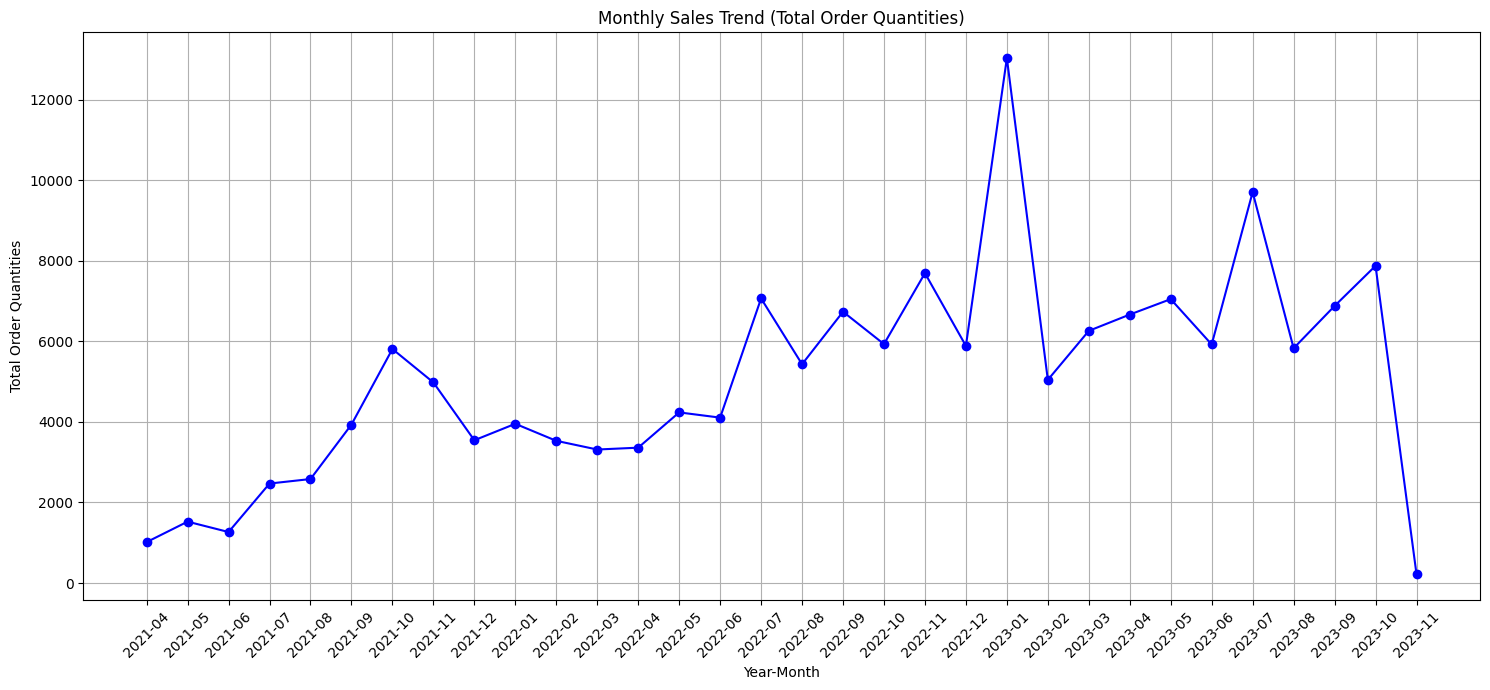

In [42]:
# Recreating the 'Year-Month' column and calculating the monthly sales trend

# Extract month and year from "Order Date" column
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Grouping by Year-Month to get total order quantities for each month
monthly_sales = df.groupby('Year-Month')['Quantity'].sum().reset_index()

# Plotting the total order quantities over time
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Quantity'], marker='o', color='blue')
plt.title("Monthly Sales Trend (Total Order Quantities)")
plt.xlabel("Year-Month")
plt.ylabel("Total Order Quantities")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Download csv file for ABC, to cross reference later



In [59]:
import numpy as np
import pandas as pd
import gspread

from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

def save_to_google_sheet(df, gc, sheet_name):
    # Create a new Google Sheet
    sh = gc.create(sheet_name)
    worksheet = sh.get_worksheet(0)

    # Convert DataFrame to a list of lists and update the Google Sheet in one batch operation
    values = [df.columns.tolist()] + df.values.tolist()
    worksheet.update('A1', values)

    return sh.url

# ... Your data processing code ...

# Replace infinite values with NaN
final_export_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with a placeholder
final_export_df.fillna("N/A", inplace=True)

# Check if any value in the dataframe is infinite, and replace it with NaN
final_export_df = final_export_df.replace([np.inf, -np.inf], np.nan)

# Save the DataFrame to Google Sheet
sheet_name = "ABC_Classification_by_Revenue_colab_update"
sheet_url = save_to_google_sheet(final_export_df, gc, sheet_name)
print(f"Data saved to: {sheet_url}")


Data saved to: https://docs.google.com/spreadsheets/d/1fq1_Hqko_33M7N8AoaH7ep7EQQ1EEvClRN8WjDfPufE


In [98]:
def generate_sku_google_sheet_with_ABC(df, years=[2021, 2022, 2023]):
    # Group by SKU and Year to calculate revenue and quantity
    grouped_df = df.groupby(['SKU', 'Year']).agg({'Annual Consumption Value': 'sum', 'Quantity': 'sum'}).reset_index()

    # Pivot tables for revenue and quantity
    revenue_pivot = grouped_df.pivot(index='SKU', columns='Year', values='Annual Consumption Value').reset_index()
    quantity_pivot = grouped_df.pivot(index='SKU', columns='Year', values='Quantity').reset_index()

    # Rename columns for clarity
    revenue_pivot.columns = ['SKU'] + [f'Revenue {year}' for year in years]
    quantity_pivot.columns = ['SKU'] + [f'Quantity {year}' for year in years]

    # For each year, classify products based on the ABC 80-15-5 rule using revenue
    for year in years:
        col_name = f'Revenue {year}'
        revenue_pivot = revenue_pivot.sort_values(col_name, ascending=False)
        revenue_pivot['Cumulative Revenue'] = revenue_pivot[col_name].cumsum() / revenue_pivot[col_name].sum()
        conditions = [
            revenue_pivot['Cumulative Revenue'] <= 0.80,
            (revenue_pivot['Cumulative Revenue'] > 0.80) & (revenue_pivot['Cumulative Revenue'] <= 0.95),
            revenue_pivot['Cumulative Revenue'] > 0.95
        ]
        choices = ['A', 'B', 'C']
        revenue_pivot[f'ABC_{year}'] = np.select(conditions, choices, default='C')

    # Merge the data
    merged_df = pd.merge(revenue_pivot, quantity_pivot, on='SKU')

    # Calculate total revenue and quantity for each SKU
    merged_df['Total Revenue'] = merged_df[[f'Revenue {year}' for year in years]].sum(axis=1)
    merged_df['Total Quantity'] = merged_df[[f'Quantity {year}' for year in years]].sum(axis=1)

    # Replace infinite values with NaN
    merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Replace NaN values with a placeholder
    merged_df.fillna("N/A", inplace=True)

    # Save the DataFrame to Google Sheet
    sheet_name = "ABC_Classification_by_SKU_with_ABC"
    sheet_url = save_to_google_sheet(merged_df, gc, sheet_name)
    return sheet_url

# Run the function to process the data and save to Google Sheet
sheet_link = generate_sku_google_sheet_with_ABC(df)
print(sheet_link)


https://docs.google.com/spreadsheets/d/1ZwDDmvW6FZiWIvYVpfPkJ96pdTLyPs71Xei5mxVqf7I


In [69]:
# Function to detect category changes for products
def detect_category_changes(df, years):
    moving_up = []
    moving_down = []

    # Loop through each SKU to check for category change
    for sku in df['SKU'].unique():
        sku_data = df[df['SKU'] == sku]

        for y1, y2 in zip(years[:-1], years[1:]):
            cat1_row = sku_data[sku_data['Year'] == y1]
            cat2_row = sku_data[sku_data['Year'] == y2]

            if not cat1_row.empty and not cat2_row.empty:
                cat1 = cat1_row['Classification'].values[0]
                cat2 = cat2_row['Classification'].values[0]

                if cat1 != cat2:
                    if cat1 > cat2:
                        moving_up.append((sku, y1, y2, f'{cat1} to {cat2}'))
                    else:
                        moving_down.append((sku, y1, y2, f'{cat1} to {cat2}'))

    return moving_up, moving_down

# Detect category changes
moving_up, moving_down = detect_category_changes(abc_df, years)

# Convert to dataframes for easier viewing
df_moving_up = pd.DataFrame(moving_up, columns=['SKU', 'From Year', 'To Year', 'Type of Move'])
df_moving_down = pd.DataFrame(moving_down, columns=['SKU', 'From Year', 'To Year', 'Type of Move'])

# Show the first few rows of each dataframe
df_moving_up.head(), df_moving_down.head()


(                SKU  From Year  To Year Type of Move
 0      PT-ZWD-LA-01       2023     2022       B to A
 1                         2023     2022       C to A
 2      PT-ZWD-SM-01       2023     2022       C to A
 3    PT-SUK-SOLO-01       2023     2022       B to A
 4  PT-SSC-3WFSET-01       2022     2021       B to A,
                 SKU  From Year  To Year Type of Move
 0  PT-SSC-4BASET-01       2023     2022       A to B
 1  PT-SSC-ORSOLO-01       2022     2021       A to B
 2  PT-SSC-CASOLO-01       2022     2021       A to B
 3      PT-SDB-3R-01       2022     2021       A to B
 4    PT-LSP-2SET-01       2022     2021       A to B)

# 8) Top 10 products per year

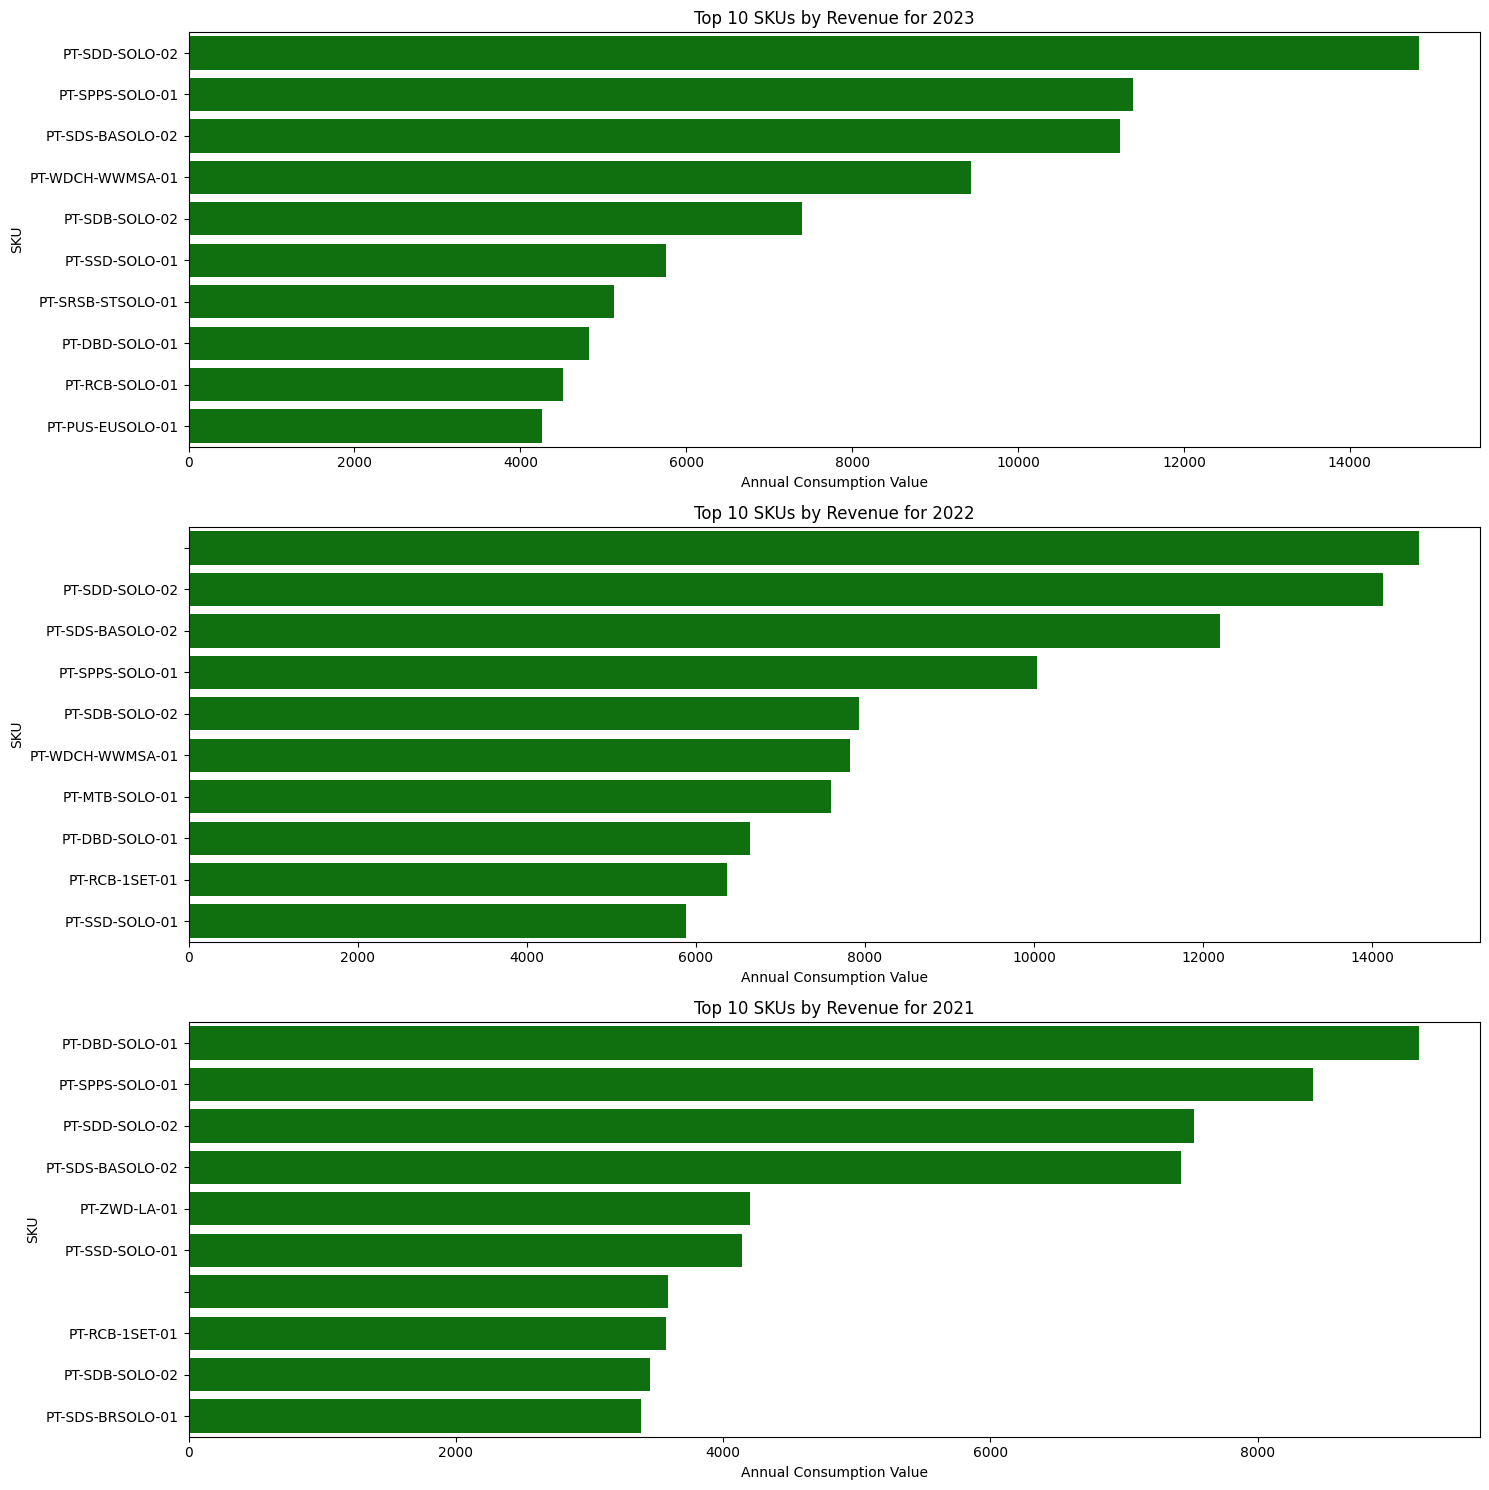

In [70]:
# Running Chunk 8

import seaborn as sns

# Grouping by SKU and Year to calculate Annual Consumption Value
sku_acv_df = df.groupby(['SKU', 'Year'])['Annual Consumption Value'].sum().reset_index()

# Initialize a dictionary to store the top 10 SKUs by ACV for each year
top_10_skus_by_acv = {}

# Create bar plots for each year
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Get top 10 SKUs by ACV for each year and plot
for idx, year in enumerate(years):
    # Filter by year and sort by ACV to get the top 10
    top_10_for_year = sku_acv_df[sku_acv_df['Year'] == year].sort_values(by='Annual Consumption Value', ascending=False).head(10)
    top_10_skus_by_acv[year] = top_10_for_year

    # Create the barplot
    sns.barplot(data=top_10_for_year, x='Annual Consumption Value', y='SKU', ax=axes[idx], color='green')
    axes[idx].set_title(f'Top 10 SKUs by Revenue for {year}')
    axes[idx].set_xlabel('Annual Consumption Value')
    axes[idx].set_ylabel('SKU')

plt.tight_layout()
plt.show()

## 8a) Top 10 Products per year by SKU. Dataframe (CSV to download)

In [71]:
# Map SKU to Product Name
sku_to_product_name = df[['SKU', 'Product Name']].drop_duplicates()

# Merge the Product Name into the top 10 SKUs by ACV DataFrame
merged_top_10_skus_by_acv = pd.concat([top_10_skus_by_acv[year].merge(sku_to_product_name, on='SKU') for year in years])

# Reorder columns for clarity
final_top_10_skus_by_acv = merged_top_10_skus_by_acv[['SKU', 'Product Name', 'Annual Consumption Value', 'Year']]

# Save to CSV
csv_path = '/kaggle/working/top_10_skus_by_acv.csv'
final_top_10_skus_by_acv.to_csv(csv_path, index=False)

csv_path

OSError: ignored

# 8 b) Time graph of the top 1-2 products per year by SKU.

<ipython-input-72-33482e61d694>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1_2_skus_df['Year-Month'] = top_1_2_skus_df['Year'].astype(str) + '-' + top_1_2_skus_df['Month'].astype(str).str.zfill(2)


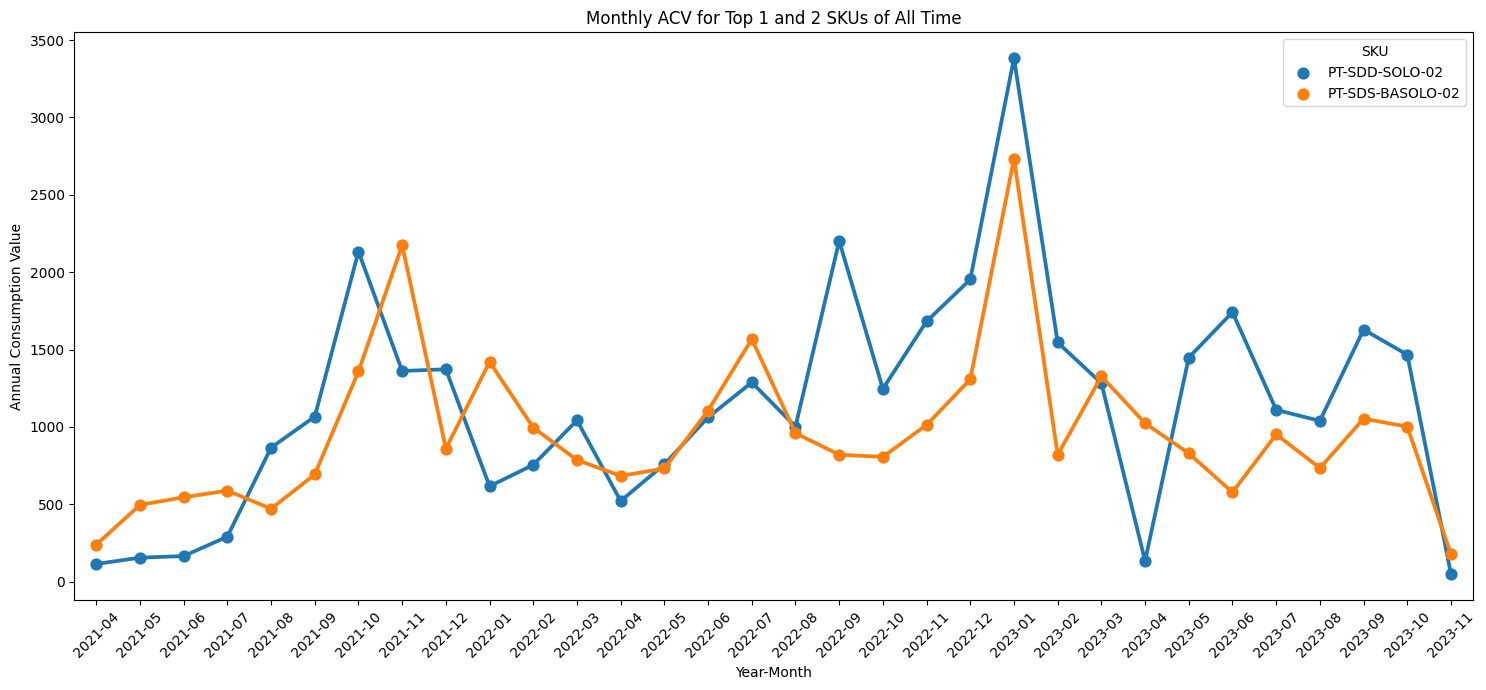

In [72]:
# Finding the top 1 and 2 SKUs of all time in terms of ACV
top_1_2_skus_all_time = sku_acv_df.groupby('SKU')['Annual Consumption Value'].sum().reset_index()
top_1_2_skus_all_time = top_1_2_skus_all_time.sort_values(by='Annual Consumption Value', ascending=False).head(2)['SKU'].tolist()

# Filtering the original dataframe to only include the top 1 and 2 SKUs
top_1_2_skus_df = df[df['SKU'].isin(top_1_2_skus_all_time)]

# Creating a 'Year-Month' column for monthly aggregation
top_1_2_skus_df['Year-Month'] = top_1_2_skus_df['Year'].astype(str) + '-' + top_1_2_skus_df['Month'].astype(str).str.zfill(2)

# Grouping by SKU, Year, and Month to get monthly ACV
monthly_acv_top_1_2_skus = top_1_2_skus_df.groupby(['SKU', 'Year-Month'])['Annual Consumption Value'].sum().reset_index()

# Plotting the point plot graph of revenue earned per month for these SKUs
plt.figure(figsize=(15, 7))
sns.pointplot(data=monthly_acv_top_1_2_skus, x='Year-Month', y='Annual Consumption Value', hue='SKU')
plt.title("Monthly ACV for Top 1 and 2 SKUs of All Time")
plt.xlabel("Year-Month")
plt.ylabel("Annual Consumption Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9) Promos
* 105% higher total order when there is a promo compared to no promo
* Data may be flawed because my promo data is older than my sales data. Can check my older case study for more accurate findings
* Can have more accurate numbers with more updated promo data

In [74]:
# Upload excel file to python
promo_data = pd.read_excel('/content/promo_excel.xlsx')

# Display the first few rows of the DataFrame
promo_data.head()

,Name,Date Start,Date End,Products Included,Uses,Status
0,SUMMERMARKET21,2021-07-26,2021-07-30,50,31,complete
1,WINTERMARKET22,2022-01-31,2022-02-05,50,57,complete
2,VEGGIEBODYBRUSH2,2022-03-11,2022-03-11,2,0,deactivated
3,VEGGIEBODYBRUSH2,2022-05-18,2022-03-21,2,1,complete
4,BUYBULK8,2022-05-31,2022-07-16,1,5,complete


In [75]:
# Convert date columns in both dataframes to datetime format for easy comparison
promo_data['Date Start'] = pd.to_datetime(promo_data['Date Start'])
promo_data['Date End'] = pd.to_datetime(promo_data['Date End'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Initialize a new column with all False (indicating no promotion initially)
df['During Promo'] = False

# Loop over each promotion
for idx, promo in promo_data.iterrows():
    # Update the 'During Promo' column to True for sales that occurred during the current promotion
    df.loc[(df['Order Date'] >= promo['Date Start']) & (df['Order Date'] <= promo['Date End']), 'During Promo'] = True

# Check the new column
df.head()

,Order Date,Order Number,Retailer Name,Address 1,Address 2,City,State,Zip Code,Country,Product Name,...,Ship Date,Scheduled Order Date,Annual Consumption Value,Year,Total Order,Unique Address,pre-ordered,Month,Year-Month,During Promo
0,2023-11-02,J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,[BUY BULK] Coconut Bottle Brush,...,No ship date,No scheduled order date,42.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...,not pre-ordered,11,2023-11,False
1,2023-11-02,J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,[BUY BULK] BULK SETS of Swedish Sponge Cloths,...,No ship date,No scheduled order date,80.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...,not pre-ordered,11,2023-11,False
2,2023-11-02,J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,[BUY BULK] BULK SETS of Swedish Sponge Cloths,...,No ship date,No scheduled order date,80.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...,not pre-ordered,11,2023-11,False
3,2023-11-02,J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,Holly Jolly - Swedish Sponge Cloth Set,...,No ship date,No scheduled order date,64.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...,not pre-ordered,11,2023-11,False
4,2023-11-02,J5TXDAGBQS,Beaverton ReStore - Habitat for Humanity,13475 Southwest Millikan Way,,Beaverton,OR,97005,United States,Cats - Swedish Sponge Cloth,...,No ship date,No scheduled order date,24.0,2023,338.0,13475 Southwest Millikan Way Beaverton OR 970...,not pre-ordered,11,2023-11,False


In [76]:
# Group the sales data by whether a sale occurred during a promotion
grouped_data = df.groupby('During Promo')

# Calculate key metrics for each group
total_sales_volume = grouped_data.size()
total_revenue = grouped_data['Annual Consumption Value'].sum()
average_revenue_per_sale = grouped_data['Annual Consumption Value'].mean()

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Total Sales Volume': total_sales_volume,
    'Total Revenue': total_revenue,
    'Average Revenue per Sale': average_revenue_per_sale
})

# Display the results
print(results)

# Please note, we need to copy and paste the total revenue True / False every time we refresh the data
print('We can see that there is an increase of ' + str(round(100 * 352446.15/213356.19)) + '% higher total order when there is a promo compared to no promo')
print('Please note we need to refresh and copy and paste the total revenue True/False every time we refresh the data')

              Total Sales Volume  Total Revenue  Average Revenue per Sale
During Promo                                                             
False                      10444      259842.92                 24.879636
True                       13934      363222.69                 26.067367
We can see that there is an increase of 165% higher total order when there is a promo compared to no promo
Please note we need to refresh and copy and paste the total revenue True/False every time we refresh the data


In [77]:
# Get the earliest and latest dates in the sales data
earliest_date = df['Order Date'].min()
latest_date = df['Order Date'].max()

# Calculate the total number of days in this range
total_days = (latest_date - earliest_date).days + 1  # "+1" to include both the start and end dates

# Create a DataFrame to hold all dates in this range
all_dates = pd.DataFrame(index=pd.date_range(start=earliest_date, end=latest_date))

# Initialize a new column to indicate whether each date is a promo date
all_dates['Is Promo'] = False

# Loop over each promotion
for idx, promo in promo_data.iterrows():
    # Update the 'Is Promo' column for dates that fall within the current promotion
    all_dates.loc[(all_dates.index >= promo['Date Start']) & (all_dates.index <= promo['Date End']), 'Is Promo'] = True

# Calculate the number of promo and non-promo days
promo_days = all_dates['Is Promo'].sum()
non_promo_days = total_days - promo_days

# Display the results
print('There were ' + str(promo_days) + ' days with promotions available to be used and ' + str(non_promo_days) + ' days with no promotion available. This results in ' + str(round(100 - 100 * (promo_days/non_promo_days ))) + ' percent more days without promo than with promo.')

There were 436 days with promotions available to be used and 494 days with no promotion available. This results in 12 percent more days without promo than with promo.


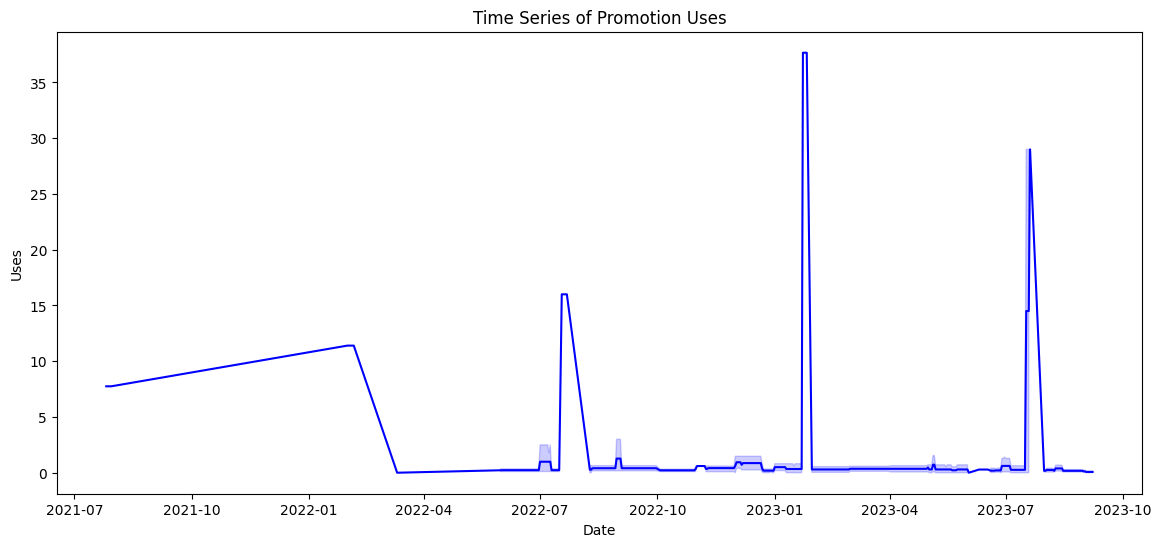

In [78]:
# Initialize an empty DataFrame to hold all promo dates and their daily usage
all_promo_dates = pd.DataFrame(columns=['Date', 'Daily Promo Uses'])

# Initialize an empty list to hold all promo_dates dataframes
all_promo_dates_list = []

# Loop over each promotion
for idx, promo in promo_data.iterrows():
    # Calculate the duration of the promotion
    duration = (promo['Date End'] - promo['Date Start']).days
    # If the start and end dates are the same, set the duration to 1
    if duration == 0:
        duration = 1

    # Create a DataFrame for all dates of the current promotion and their daily usage
    promo_dates = pd.DataFrame(data={
        'Date': pd.date_range(start=promo['Date Start'], end=promo['Date End']),
        'Daily Promo Uses': promo['Uses'] / duration
    })
    # Append the dates of the current promotion to the list
    all_promo_dates_list.append(promo_dates)

# Concatenate all dataframes in the list into the main DataFrame
all_promo_dates = pd.concat(all_promo_dates_list)

# Convert 'Date' to datetime format for plotting
all_promo_dates['Date'] = pd.to_datetime(all_promo_dates['Date'])

# Add a column for the year
all_promo_dates['Year'] = all_promo_dates['Date'].dt.year

# Compute the mean promo usage for each year
mean_promo_usage_by_year = all_promo_dates.groupby('Year')['Daily Promo Uses'].mean()

# Create a time series plot for 'Uses' over time with mean promo usage lines
plt.figure(figsize=(14, 6))
sns.lineplot(data=all_promo_dates, x='Date', y='Daily Promo Uses', color='b')


plt.xlabel('Date')
plt.ylabel('Uses')
plt.title('Time Series of Promotion Uses')

# Create a custom legend

plt.show()

## Findings : Promo Data
* It seems like promo usage in 2023 is a huge success, especially the winermarket and faire market promotions
* Promotional use between the winter and faire markets are lower, and this may just be due to less demand for our products during these periods, as these are also spikes in sales times (the market promo times)
* We have two actions we can take:
1.  Improve the promotions between markets, as that is an area that has the most room for improvement
2.  Double down on the winter and faire markets, and capitalize on the momentum / demand during those sales times. Find ways to further increase the sales of our products during these peak times.                                  

# 10) Average customer lifetime value
* Below, we can see that the **average customer lifetime value since 2021 is $384.38 for our Faire customers**
* Calculated by total revenue / total unique addresses.

In [79]:
# Chunk 9: Calculate average customer lifetime value

# Sum up the "Annual Consumption Value" and count the number of unique addresses
total_annual_consumption_value = df['Annual Consumption Value'].sum()
unique_addresses_count = df['Unique Address'].nunique()

# Calculate the average customer lifetime value
average_customer_lifetime_value = total_annual_consumption_value / unique_addresses_count

total_annual_consumption_value, unique_addresses_count, average_customer_lifetime_value

(623065.61, 1606, 387.9611519302615)

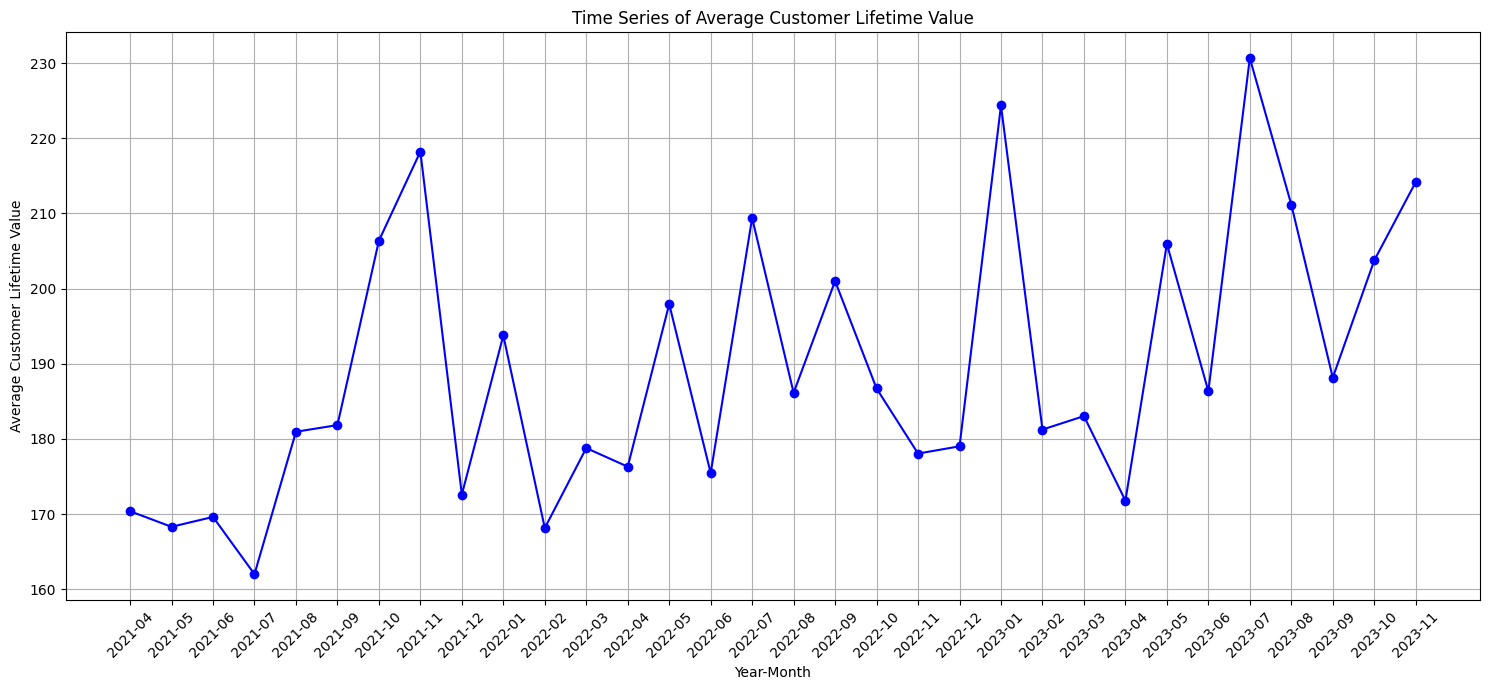

In [80]:
# Calculate the time-series of average customer lifetime value

# Group by 'Year-Month' to sum up the "Annual Consumption Value" and count the number of unique addresses
grouped_df = df.groupby('Year-Month').agg({'Annual Consumption Value': 'sum', 'Unique Address': 'nunique'}).reset_index()
grouped_df['Average Customer Lifetime Value'] = grouped_df['Annual Consumption Value'] / grouped_df['Unique Address']

# Plotting the time series of average customer lifetime value
plt.figure(figsize=(15, 7))
plt.plot(grouped_df['Year-Month'], grouped_df['Average Customer Lifetime Value'], marker='o', color='blue')
plt.title("Time Series of Average Customer Lifetime Value")
plt.xlabel("Year-Month")
plt.ylabel("Average Customer Lifetime Value")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 11) Average total order value
* The average total order value is **$206.17**

In [81]:
# Calculate the average of the "Order Total" column
average_order_total = df['Total Order'].mean()
average_order_total

206.5289716137501

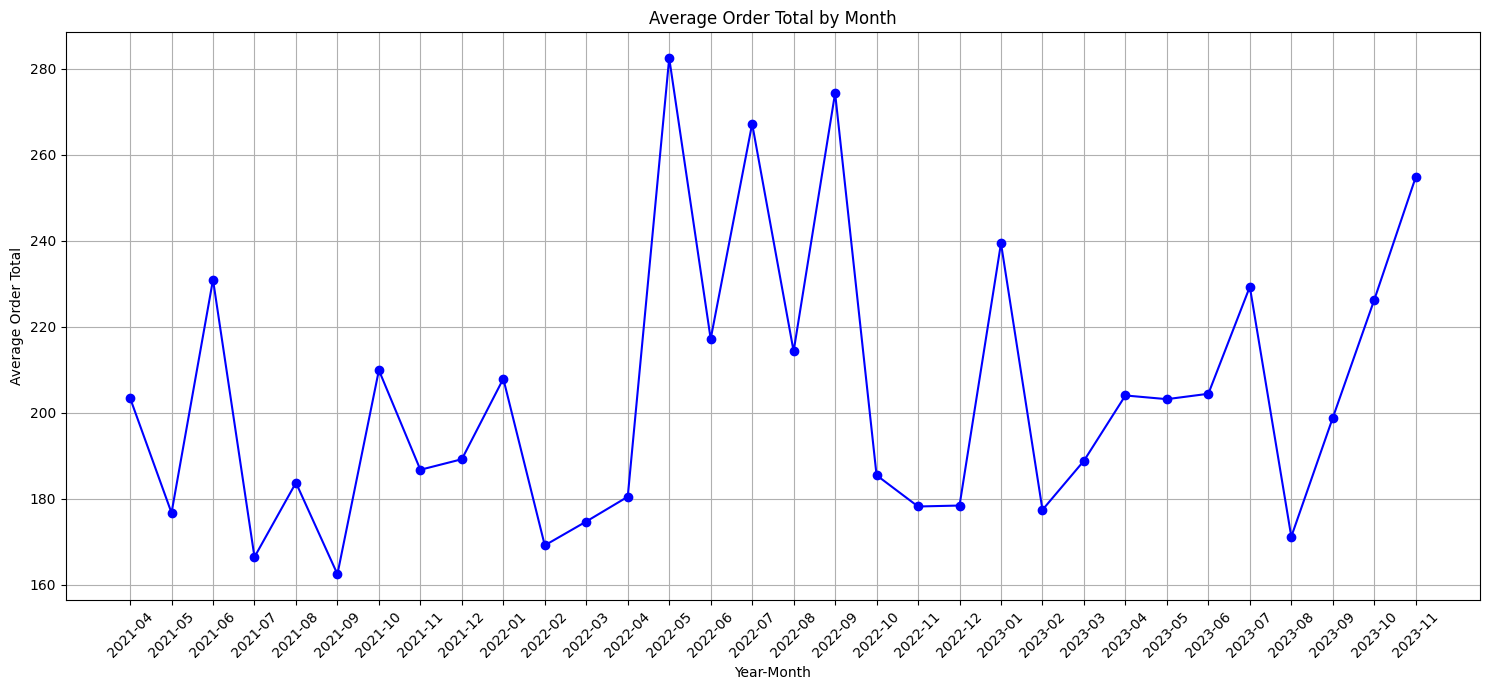

In [82]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'Order Date' to datetime format and extract the year and month
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Create 'Year-Month' column for monthly aggregation
df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)

# Convert the "Wholesale Price" column to numeric format (if it's a string)
if df['Wholesale Price'].dtype == 'object':
    df['Wholesale Price'] = df['Wholesale Price'].str.replace('$', '').astype(float)

# Calculate the annual consumption value for each product for each year
df['Annual Consumption Value'] = df['Quantity'] * df['Wholesale Price']

# Calculate the Order Total for each unique order number
df['Total Order'] = df.groupby('Order Number')['Annual Consumption Value'].transform('sum')

# Create a unique address column by combining the relevant address fields
df['Unique Address'] = df['Address 1'].astype(str) + ' ' + \
                       df['Address 2'].astype(str) + ' ' + \
                       df['City'].astype(str) + ' ' + \
                       df['State'].astype(str) + ' ' + \
                       df['Zip Code'].astype(str) + ' ' + \
                       df['Country'].astype(str)

# Calculate the average of the "Order Total" column by 'Year-Month'
average_order_total_by_month = df.groupby('Year-Month')['Total Order'].mean().reset_index()

# Plotting the average order total by month
plt.figure(figsize=(15, 7))
plt.plot(average_order_total_by_month['Year-Month'], average_order_total_by_month['Total Order'], marker='o', color='blue')
plt.title("Average Order Total by Month")
plt.xlabel("Year-Month")
plt.ylabel("Average Order Total")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [83]:
# Calculate average order value by day
average_order_value_by_day = df.groupby('Order Date')['Annual Consumption Value'].sum().reset_index()

print(average_order_value_by_day)

    Order Date  Annual Consumption Value
0   2021-04-17                    269.99
1   2021-04-18                    230.08
2   2021-04-20                    432.13
3   2021-04-21                    657.04
4   2021-04-22                    655.48
..         ...                       ...
869 2023-10-29                    632.11
870 2023-10-30                    852.65
871 2023-10-31                    740.18
872 2023-11-01                    732.87
873 2023-11-02                    338.00

[874 rows x 2 columns]


# Total Order Value By Quarter
* We can see that the avg order value is going up.
* Looks iffy in 2023, but that is because 2023 Q3 is yet to conclude.

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


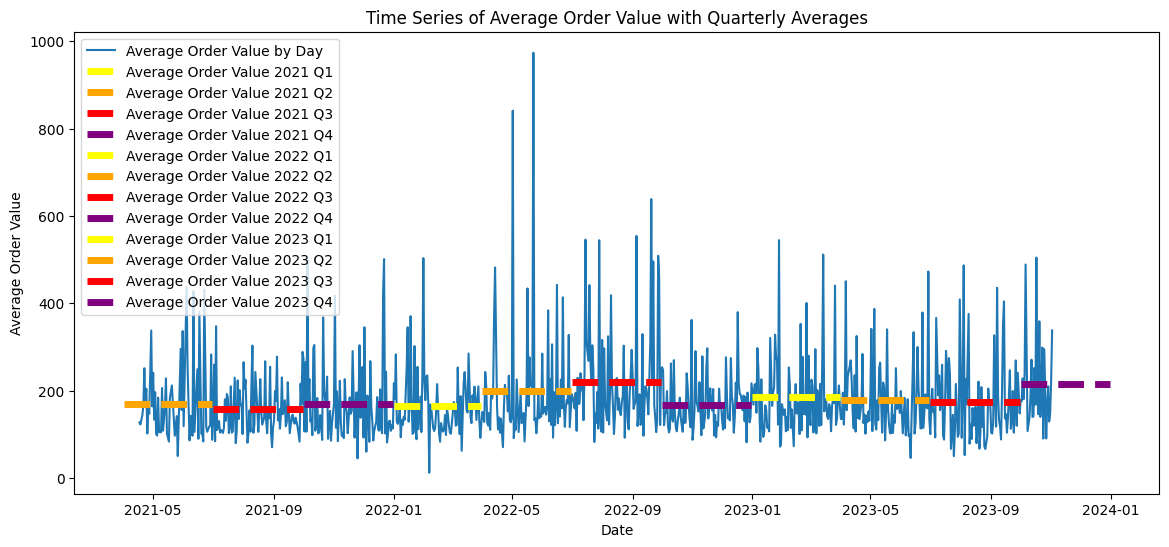

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Order Date' and 'Total Order' are your columns

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate average order value by day
average_order_value_by_day = df.groupby('Order Date')['Total Order'].mean().reset_index()

# Create a column for the year
average_order_value_by_day['Year'] = average_order_value_by_day['Order Date'].dt.year

# Create a column for the quarter
average_order_value_by_day['Quarter'] = average_order_value_by_day['Order Date'].dt.quarter

# Create time series plot for average total order value by day
plt.figure(figsize=(14, 6))
sns.lineplot(data=average_order_value_by_day, x='Order Date', y='Total Order', label='Average Order Value by Day')

# Define colors for each quarter
quarter_colors = {1: 'yellow', 2: 'orange', 3: 'red', 4: 'purple'}

# Loop through the years and quarters to calculate and plot the lines
for year in [2021, 2022, 2023]:
    for quarter in [1, 2, 3, 4]:
        # Filter average_order_value_by_day for each quarter of the year
        order_value = average_order_value_by_day[(average_order_value_by_day['Year'] == year) & (average_order_value_by_day['Quarter'] == quarter)]

        # Calculate the average order value for the quarter
        average_order_value = order_value['Total Order'].mean()

        # Calculate the start and end dates for each quarter
        start_date = pd.Timestamp(year=year, month=(quarter - 1) * 3 + 1, day=1)
        end_date = pd.Timestamp(year=year, month=quarter * 3, day=[31, 30, 30, 31][quarter - 1])

        # Add horizontal lines to represent the average order value for the quarter
        plt.hlines(y=average_order_value, xmin=start_date, xmax=end_date, color=quarter_colors[quarter], linestyle='--', linewidth=5, label=f'Average Order Value {year} Q{quarter}')

plt.xlabel('Date')
plt.ylabel('Average Order Value')
plt.title('Time Series of Average Order Value with Quarterly Averages')
plt.legend()
plt.show()

## Findings : What is the average total order value? How do we increase this?
### The average total order value is $206.17 USD

To increase he average order value, there are multiple suggestions :
1. We can add **incentives to increase order value -- like a free shipping** deal for orders over \\$100 or give a free item after surpassing \\$200. I noticed that there is a minimum order value for the product to not be pre-ordered

2. We can have **combo deals / packs that work with each other**. This could add an item that customers otherwise would  not have purchased.

3. **More frequent promotions and sales** -- Sales can lead to customers buying more products and bulk buying due to lower cost. We can see that promotions used in Q4 is low and this is because they usually stock up in Q3 but maybe if incentivizing spending on our products for that quarter can still bolster order total value in Q4.


# 12) Total Cost of Damaged or Missing items

In [90]:
import pandas as pd
import gspread

from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# Function to fetch data from Google Sheet
def fetch_data_from_sheet(sheet_url, gc):
    # Extracting sheet ID from the URL
    sheet_id = sheet_url.split('/')[-2]
    worksheet = gc.open_by_key(sheet_id).sheet1

    # Getting all values from the sheet and converting to DataFrame
    rows = worksheet.get_all_values()
    df = pd.DataFrame.from_records(rows[1:], columns=rows[0])

    return df

# Load the faire-payouts dataset from the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/10JyZzs7CUKl3lxuSoGUj_3vtP-8pe7xj5PifsC8YlOc/edit#gid=1416349062"
payouts = fetch_data_from_sheet(sheet_url, gc)

# Ensure the 'Damaged Or Missing' column is treated as numeric
payouts['Damaged Or Missing'] = pd.to_numeric(payouts['Damaged Or Missing'], errors='coerce')

# Calculate the total cost of damaged or missing items
total_cost_damaged_missing = payouts['Damaged Or Missing'].sum()

# Display the total cost
total_cost_damaged_missing

4606.79

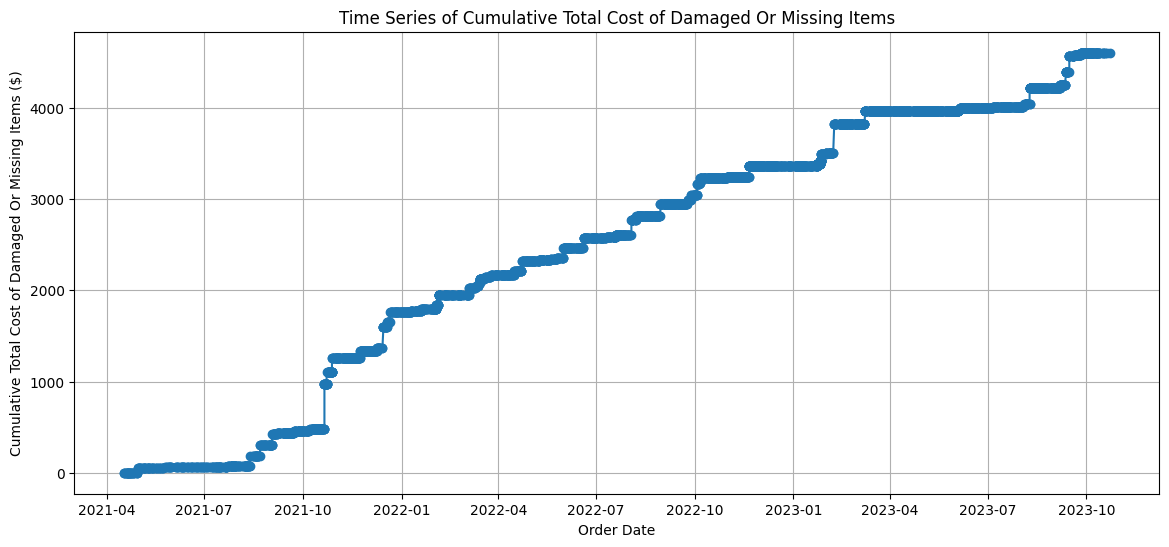

In [91]:
# Importing required libraries for plotting
import matplotlib.pyplot as plt

# Convert 'Order Date' to datetime format
payouts['Order Date'] = pd.to_datetime(payouts['Order Date'])

# Sort the DataFrame by 'Order Date'
payouts_sorted = payouts.sort_values('Order Date')

# Calculate the cumulative sum of the 'Damaged Or Missing' column
payouts_sorted['Cumulative Damaged Or Missing'] = payouts_sorted['Damaged Or Missing'].cumsum()

# Create the time series plot
plt.figure(figsize=(14, 6))
plt.plot(payouts_sorted['Order Date'], payouts_sorted['Cumulative Damaged Or Missing'], marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Cumulative Total Cost of Damaged Or Missing Items ($)')
plt.title('Time Series of Cumulative Total Cost of Damaged Or Missing Items')
plt.grid(True)
plt.show()


In [92]:
# Extract the year from 'Order Date' and create a new column for it
payouts['Year'] = payouts['Order Date'].dt.year

# Group by year and sum the 'Damaged Or Missing' column
total_cost_per_year = payouts.groupby('Year')['Damaged Or Missing'].sum().reset_index()

# Filter for the years 2021, 2022, and 2023
total_cost_per_year_filtered = total_cost_per_year[total_cost_per_year['Year'].isin([2021, 2022, 2023])]

total_cost_per_year_filtered

,Year,Damaged Or Missing
0,2021,1767.76
1,2022,1592.11
2,2023,1246.92


## Findings Damaged or Missing items
The total cost of damaged or missing items, according to the payouts faire data is \\$4008.50
* We can see that the total cost per year is decreasing, in terms of damaged or missing items recorded in the faire data.
* In 2021, it was \\$1767.76
* In 2022, it was \\$1592.11
* In 2023, it is \\$648.63, but that is because the year is not complete!
* Per day, since 2021 the total cost of damaged or missing items is $5.02

## Suggestions for inventory management
1. More than one warehouse, maybe an east and west warehouse. This is so the shipping distance is less per order. This could decrease shipping cost and also, less travel means less chance of damaged product.
2. Inventory audits : More regular counting of material or sorting / organization could lead to less inventory going missing.
3. Inventory tracking : Use inventory management software to track inventory levels in real-time, which can help prevent shortages and excesses.
4. Many products get damaged during shipping due to inadequate or improper packaging. Investing in better packaging materials and techniques can reduce the damage rate.
5. Use sales data and analytics to forecast future demand for products. This can help you keep the right amount of stock on hand and avoid overstocking or understocking.

# 13) Revenue Analysis

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


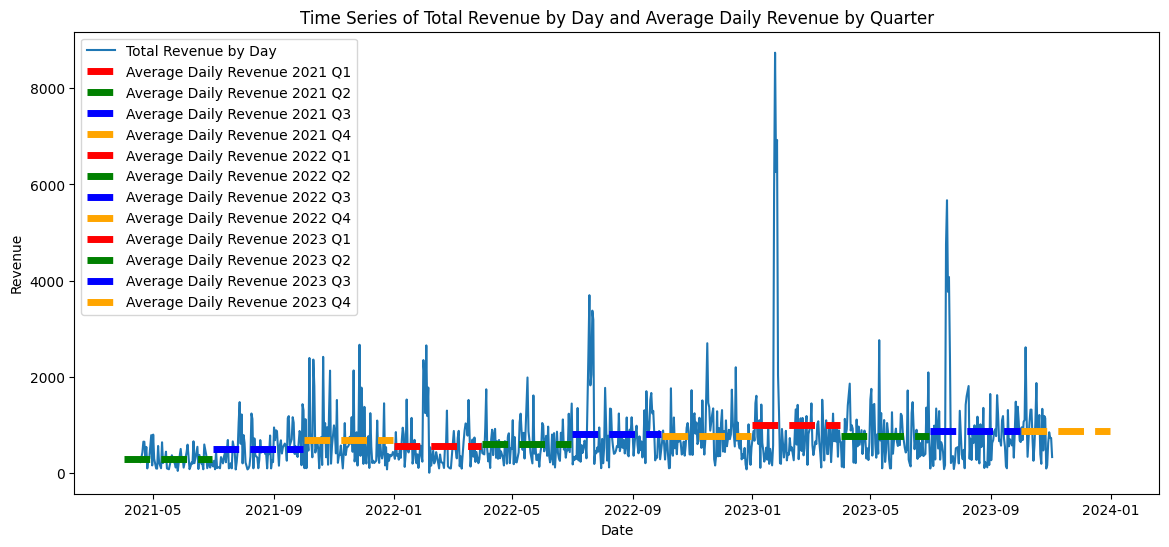

In [93]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Order Date' and 'Annual Consumption Value' are your columns

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate total revenue per day
total_revenue_per_day = df.groupby('Order Date')['Annual Consumption Value'].sum().reset_index()

# Create a column for the year
total_revenue_per_day['Year'] = total_revenue_per_day['Order Date'].dt.year

# Create a column for the month
total_revenue_per_day['Month'] = total_revenue_per_day['Order Date'].dt.month

# Create time series plot for total revenue by day
plt.figure(figsize=(14, 6))
sns.lineplot(data=total_revenue_per_day, x='Order Date', y='Annual Consumption Value', label='Total Revenue by Day')

# Loop through the years and quarters to calculate and plot the lines
for year in [2021, 2022, 2023]:
    for quarter, color in zip([1, 2, 3, 4], ['r', 'g', 'b', 'orange']):
        # Filter total_revenue_per_day for each quarter of the year
        revenue_by_quarter = total_revenue_per_day[(total_revenue_per_day['Year'] == year) & total_revenue_per_day['Month'].isin(range((quarter - 1) * 3 + 1, quarter * 3 + 1))]

        # Calculate the average daily revenue for the quarter
        average_daily_revenue = revenue_by_quarter['Annual Consumption Value'].mean()

        # Calculate the start and end dates for each quarter
        start_date = pd.Timestamp(year=year, month=(quarter - 1) * 3 + 1, day=1)
        end_date = pd.Timestamp(year=year, month=quarter * 3, day=[31, 30, 30, 31][quarter - 1])

        # Add horizontal lines to represent the average daily revenue for each quarter
        plt.hlines(y=average_daily_revenue, xmin=start_date, xmax=end_date, color=color, linestyle='--', linewidth=5.0, label=f'Average Daily Revenue {year} Q{quarter}')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Time Series of Total Revenue by Day and Average Daily Revenue by Quarter')
plt.legend()
plt.show()

## Findings Revenue Trend
* **Revenue is trending upwards**, according to our Faire data. This is good news! We can see that Q1 and Q3 are definitely our best years, and Q1 2023 was our best quarter by far. This is due to 2023 wintermarket success
* **Q3 2023 is not finished yet**, so it is hard to conclude, but we already **beat our 2022 revenue gained.**
* **We can see that the revenue from 2023 is much improved from 2022, and 2022 was much improved to 2021, this is a great sign of improvement.**

# Download csvs for Dasboarding

In [97]:
import numpy as np
import pandas as pd
import gspread

from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

def save_to_google_sheet(df, gc, sheet_name):
    # Convert any datetime columns to string
    for col in df.columns:
        if df[col].dtype == 'datetime64[ns]':
            df[col] = df[col].astype(str)

    # Ensure no individual Timestamp objects remain
    df = df.applymap(lambda x: str(x) if isinstance(x, pd.Timestamp) else x)

    # Create or open a Google Sheet
    sh = gc.create(sheet_name)
    worksheet = sh.get_worksheet(0)

    # Convert DataFrame to a list of lists and update the Google Sheet in one batch operation
    values = [df.columns.tolist()] + df.values.tolist()
    worksheet.update('A1', values)

    return sh.url

# Save the DataFrames to Google Sheets
orders_sheet_url = save_to_google_sheet(df, gc, "faire_orders_refined")
payouts_sheet_url = save_to_google_sheet(payouts, gc, "faire_payouts_refined")

print(f"Orders data saved to: {orders_sheet_url}")
print(f"Payouts data saved to: {payouts_sheet_url}")

Orders data saved to: https://docs.google.com/spreadsheets/d/1Ow4fXDz5sHVZTYJH8WIPhF5JqfInL8DqiR22bKvKBVY
Payouts data saved to: https://docs.google.com/spreadsheets/d/1ifloPgfS30hjx5ppQi185vsZe_5db-6lVR8-1bxomOU
